In [43]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import csv

In [50]:
# read files
li = list()
for i in range(1,4):
    filename = '3node/node{}.csv'.format(i)
    with open(filename, 'r') as cf:
        data = cf.readlines()
        for row in data:
            li.append(row.split(','))
#     display(df1)
# display(li[1][0])
print(np.shape(li))

'1643860173.4864666'

(2089, 5)


In [76]:
# deal with delay and bandwidth per second
delay = [[]for i in range(100)]
bw = [[]for i in range(100)]
begin = float(li[0][0])+float(li[0][3])
begin = float(begin)
print(begin)
for t in range(100):
    for i in range(len(li)):
        if float(li[i][0])+float(li[i][3])>=begin+t and float(li[i][0])+float(li[i][3])<begin+t+1:
            delay[t].append(float(li[i][3]))
            bw[t].append(float(li[i][4]))
dl = pd.DataFrame.from_records(delay).T
bww = pd.DataFrame.from_records(bw).T
bww = bww.sum()
dl.index += 1
bww.index += 1
bww

1643860172.44575


1       88.0
2      267.0
3      178.0
4      178.0
5       88.0
       ...  
96     620.0
97     445.0
98     530.0
99     444.0
100    710.0
Length: 100, dtype: float64

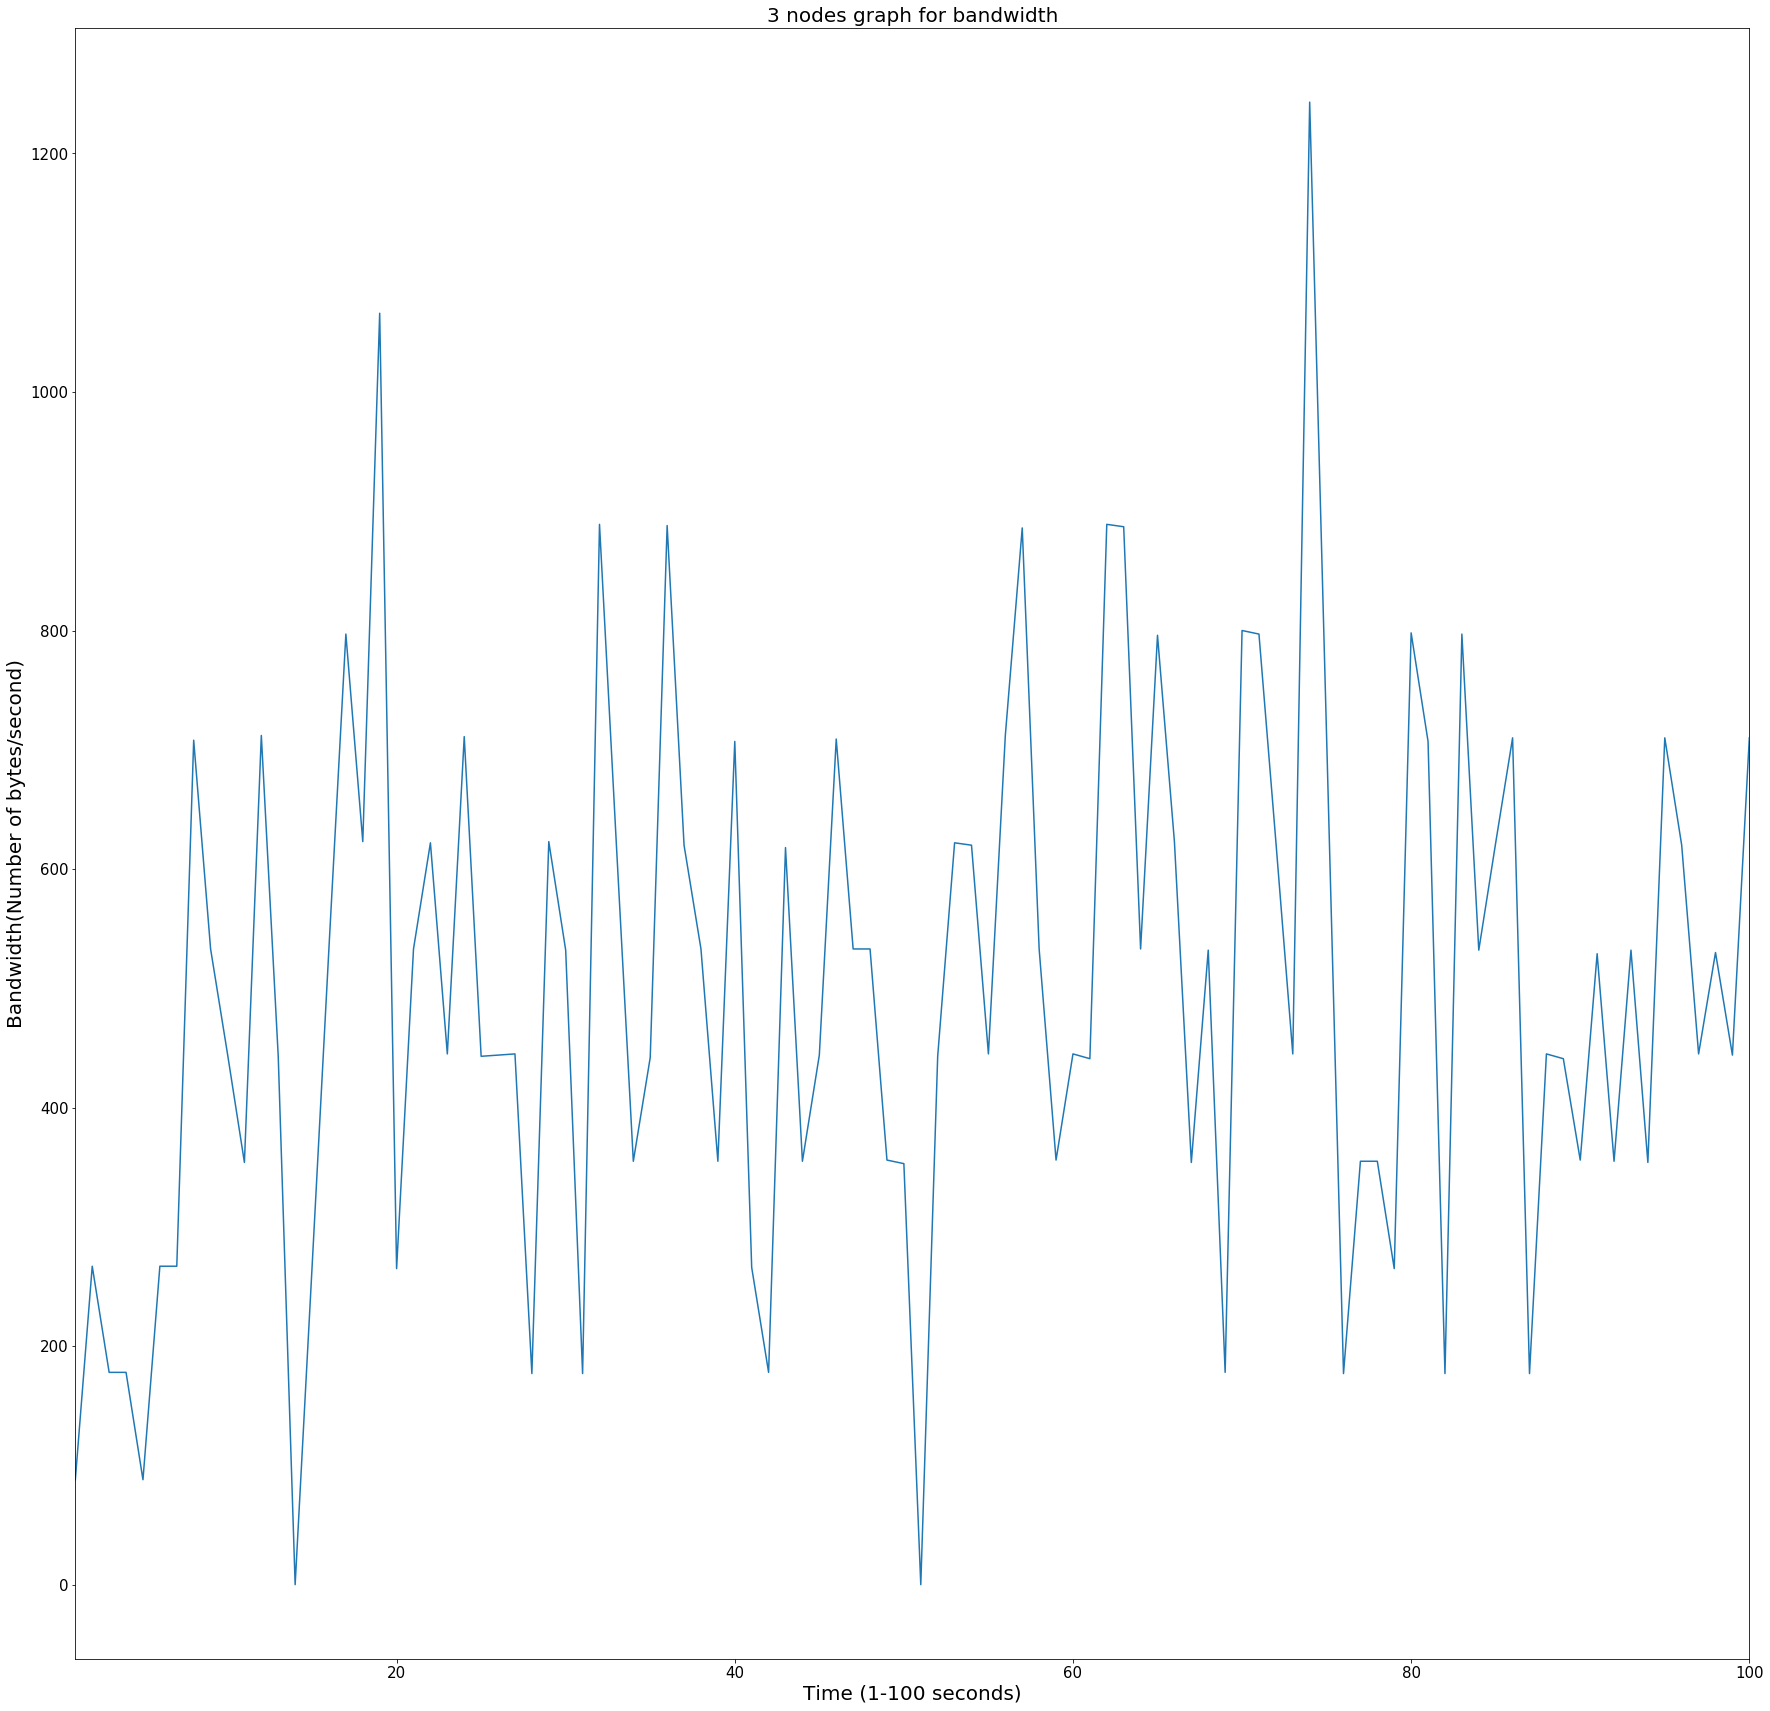

In [125]:
# bandwidth graph for 3 nodes
ax_bd = bww.plot(x="time",y="Bandwidth(Number of bytes/second)",kind="line",figsize=(30,30),fontsize=15)
ax_bd.set_xlabel("Time (1-100 seconds)",fontsize=20)
ax_bd.set_ylabel("Bandwidth(Number of bytes/second)",fontsize=20)
ax_bd.set_title("3 nodes graph for bandwidth",fontsize=20)
plot.show()

Text(0.5, 1.0, '3 nodes graph for delay')

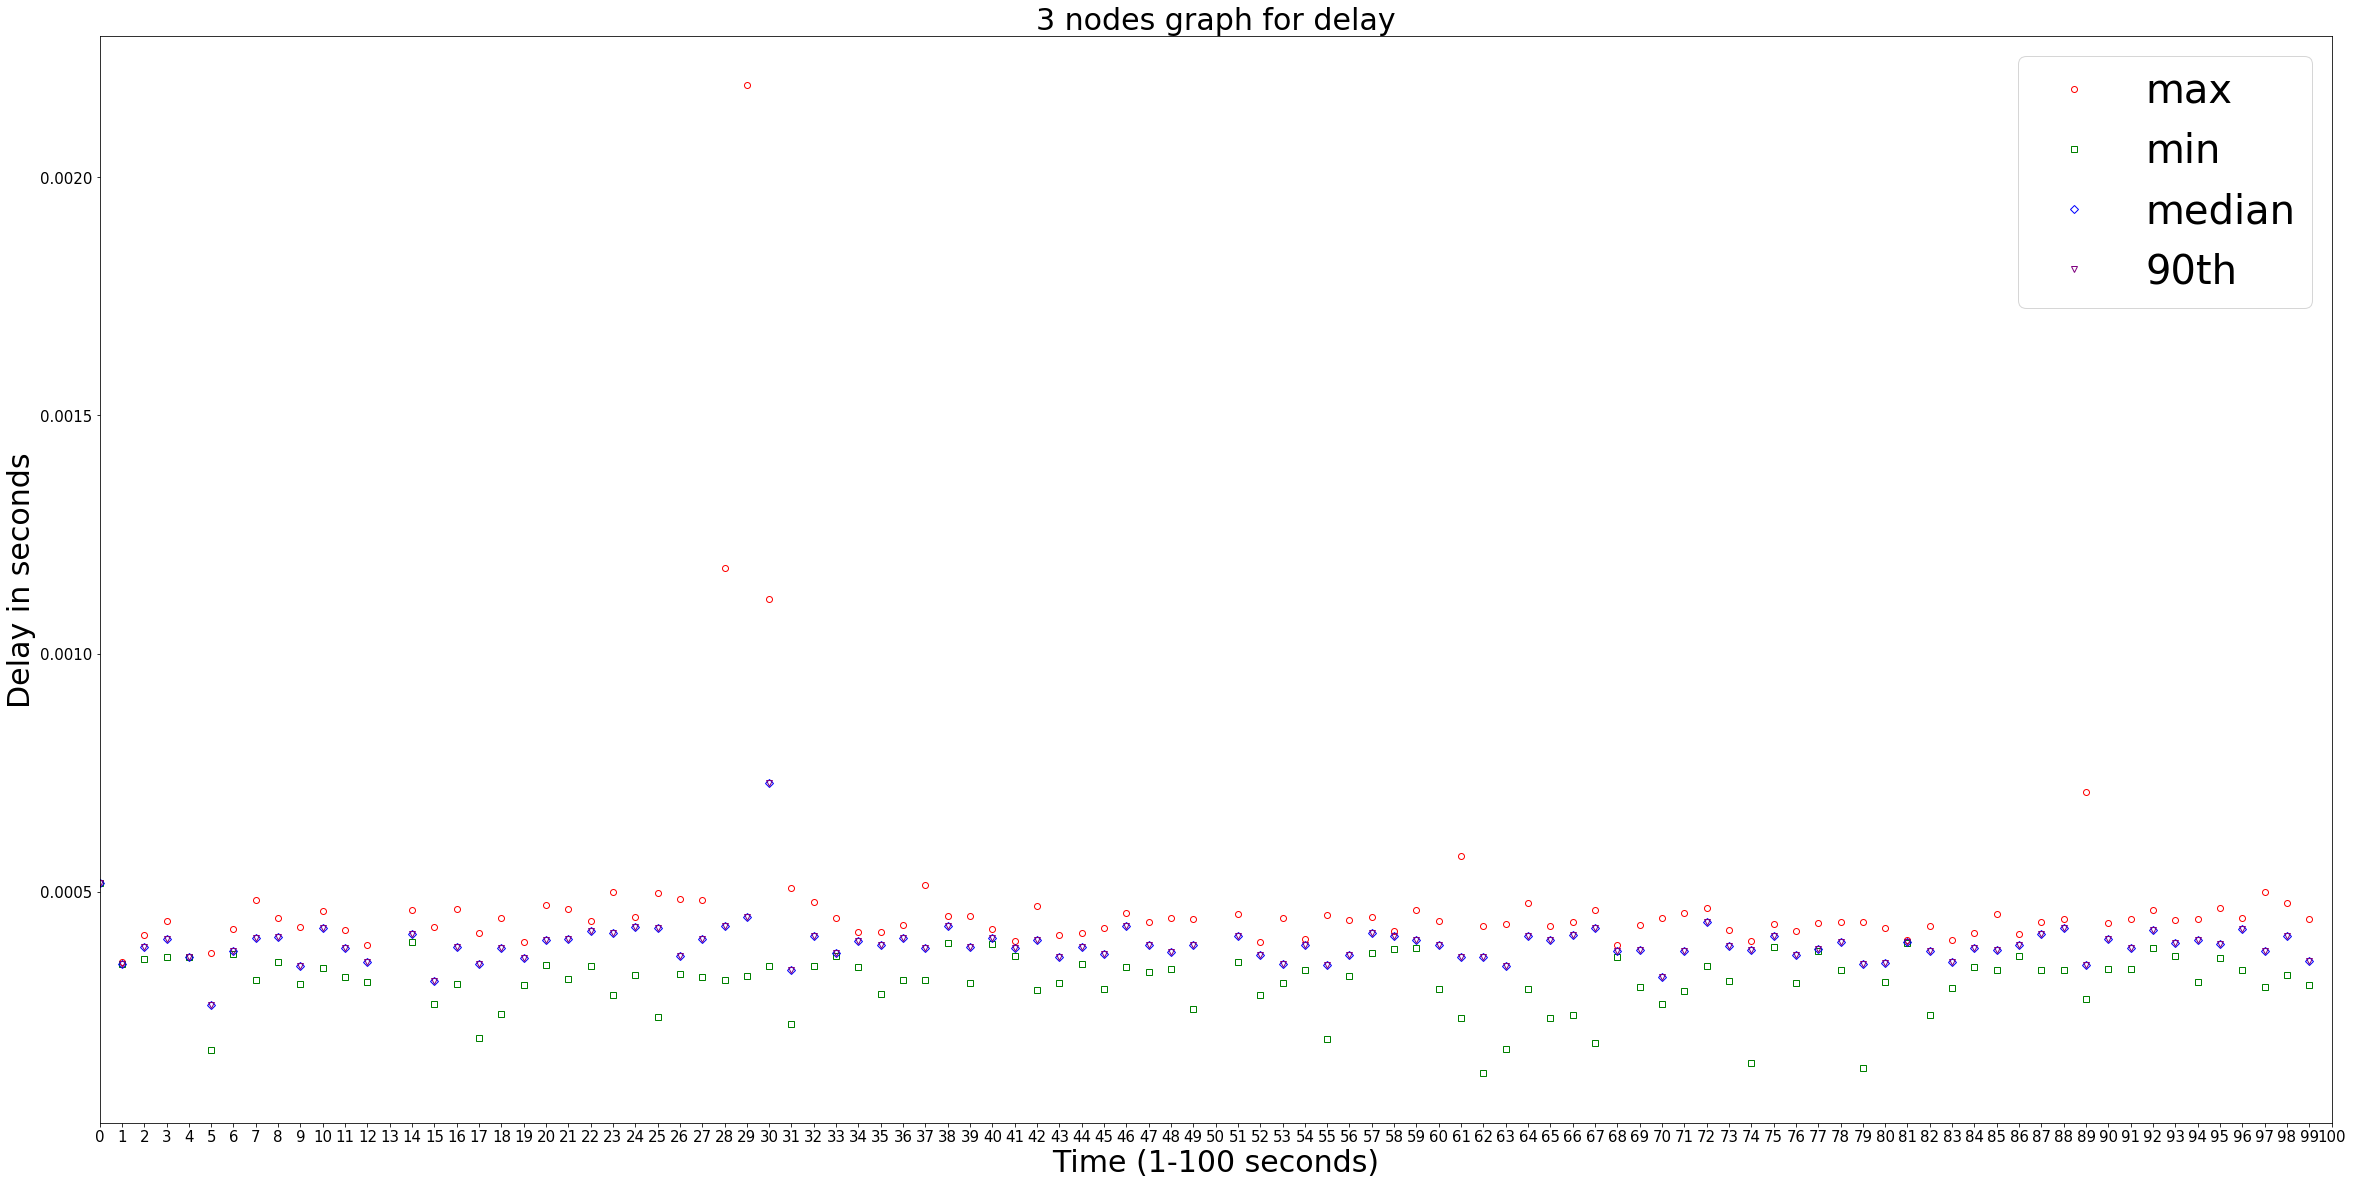

In [127]:
# delay graph for 3 nodes
tresmax = dl.max()
tresmin = dl.min()
tresmed = dl.median()
tres90 = dl.quantile(0.9)
plot.subplots(figsize=(40,20))
tresmax.plot(x='Time',xticks=np.arange(0,101,1),marker='o',linestyle='None',markerfacecolor='None',color='r',fontsize=15)
tresmin.plot(x='Time',xticks=np.arange(0,101,1),marker='s',linestyle='None',markerfacecolor='None',color='g',fontsize=15)
tresmed.plot(x='Time',xticks=np.arange(0,101,1),marker='D',linestyle='None',markerfacecolor='None',color='b',fontsize=15)
tresmed.plot(x='Time',xticks=np.arange(0,101,1),marker='v',linestyle='None',markerfacecolor='None',color='purple',fontsize=15)
plot.legend(['max','min','median','90th'],fontsize=40)
plot.xlabel("Time (1-100 seconds)",fontsize=30)
plot.ylabel("Delay in seconds",fontsize=30)
plot.title('3 nodes graph for delay',fontsize=30)